In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
combined_data = pd.read_csv("clean_data/combined_data/combined_data_debrief.csv")
combined_data = combined_data.loc[combined_data["participant_code"] != "enjhdbed"] #exclude us, i.e. player 4 in first pilot
combined_data = combined_data.loc[combined_data["participant_code"] != "j89thiah"] #exclude woman with baby in session 1, i.e. player 5 in first pilot.
combined_data = combined_data.loc[combined_data["participant_code"] != "97ajc1w1"] #exclude p4 in session Mklqs5l0, was inactive during entire thing except for round 1 (dropout)- 


In [3]:

#Create unique players
combined_data["player"] = combined_data["player"].astype(str)
combined_data["player"] = combined_data["player"] + combined_data["prolific_id"]

#combine session code with mastok session
combined_data['mk_session'] = combined_data['mk_session'].replace('mk:Ultimatum_Game_Real:', 'mk_', regex=True)
combined_data['mk_session'] = combined_data['mk_session'] + "_" + combined_data['session_code']

In [11]:
combined_data["manipulation"].mean() #23.8 % detect manipulation. 
combined_data.groupby(["manipulation"])['detection_degree'].mean() #34.8 mean detection degree for in the category of people that noticed manip. 

manipulation
0.0     6.25
1.0    34.80
Name: detection_degree, dtype: float64

<Axes: xlabel='unique_interactions', ylabel='Count'>

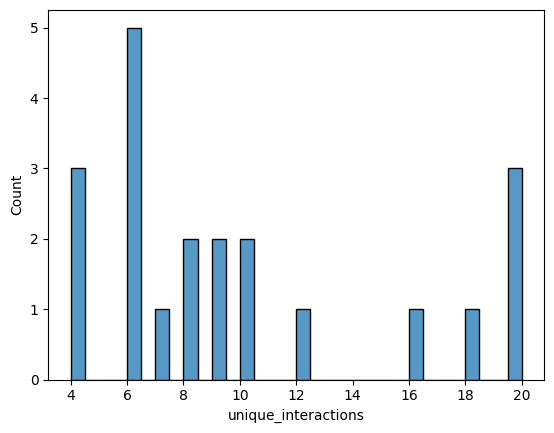

In [15]:
combined_data["unique_interactions"].mean() #9.95
sns.histplot(x = "unique_interactions", data=combined_data, binwidth=.5)

In [4]:
df_analysis = combined_data.groupby(["mk_session"])['unique_interactions'].mean().reset_index()